## Installed Libraries

In [1]:
import colorio as cio
import colormath as cm
import colorspacious as csp
import colour_checker_detection as ccd
import colour_hdri as chdri
import colour as color # colour-science
import matplotlib as plt
import numpy as np
import OpenEXR as exr
import OpenImageIO as oiio
import PIL # Pillow
import PyOpenColorIO as ocio
import scipy

import jlab

/workspace/.pip-modules/lib/python3.8/site-packages/colour/utilities/verbose.py:237: ColourWarning: "Adobe DNG Converter" is not available on your platform!
  warn(*args, **kwargs)


## PIL (Pillow)

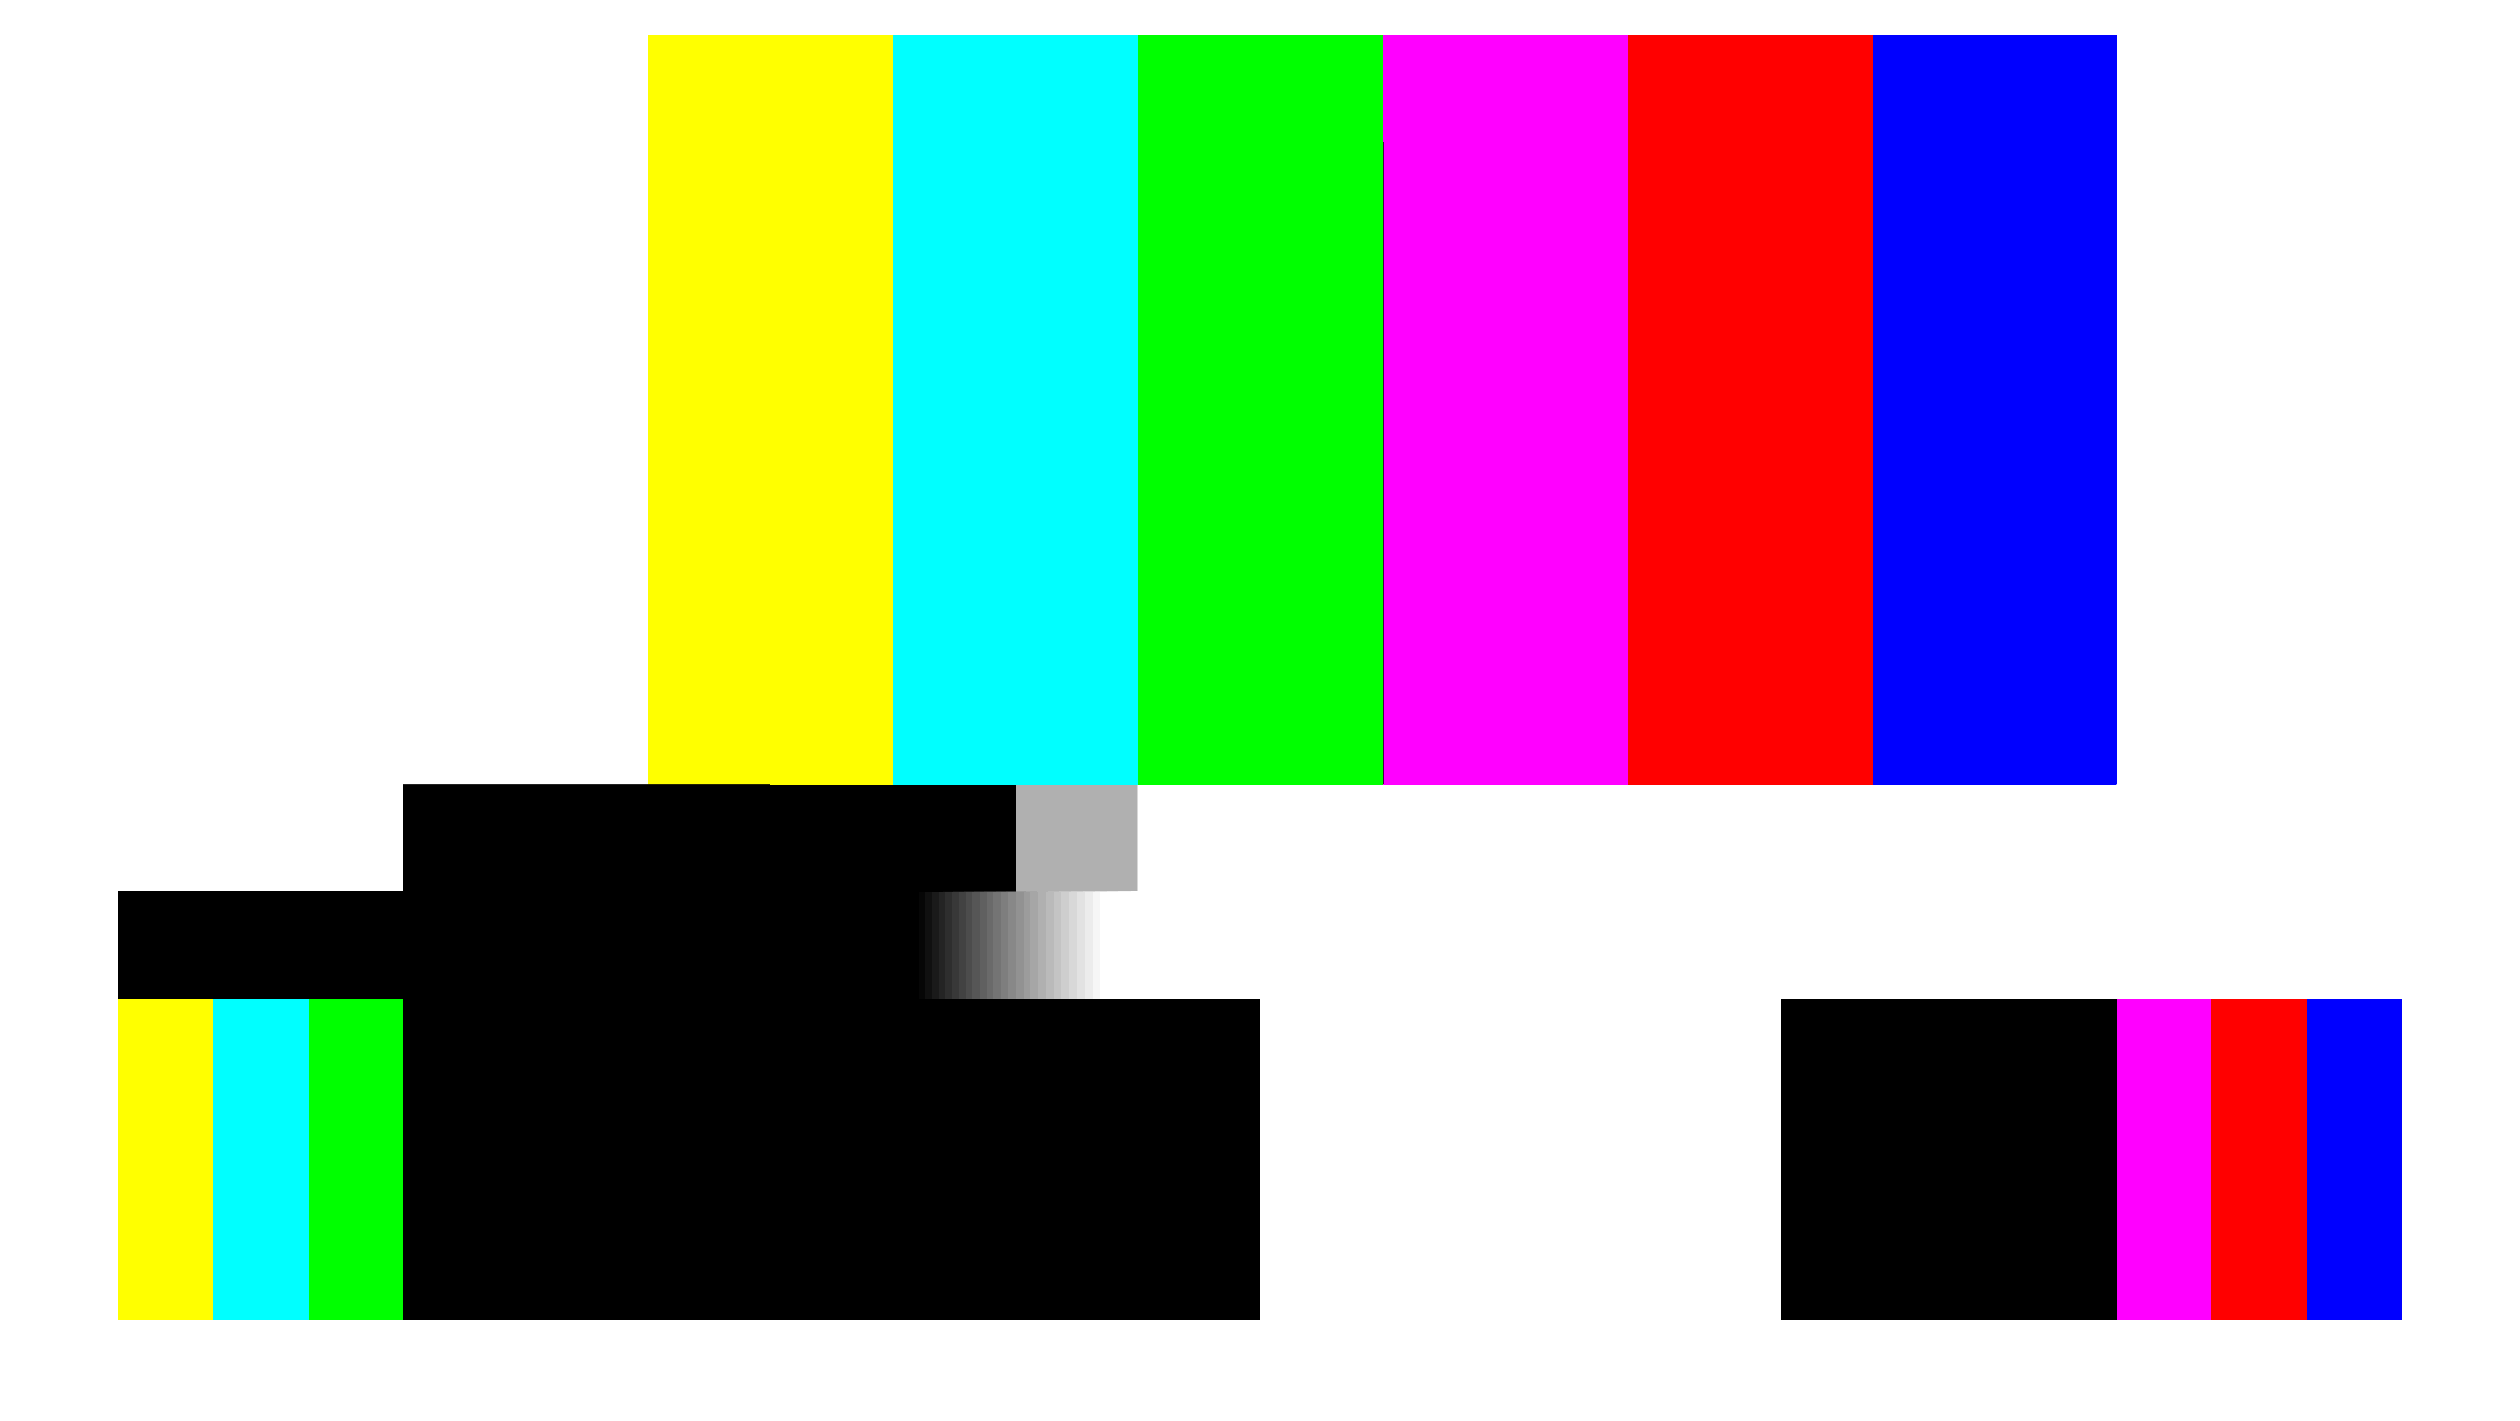

In [2]:
from PIL import ImageEnhance, Image

im = Image.open("data/BT.2111-sRGB.png")
enh = ImageEnhance.Contrast(im)
enh.enhance(10)

## Colour Science

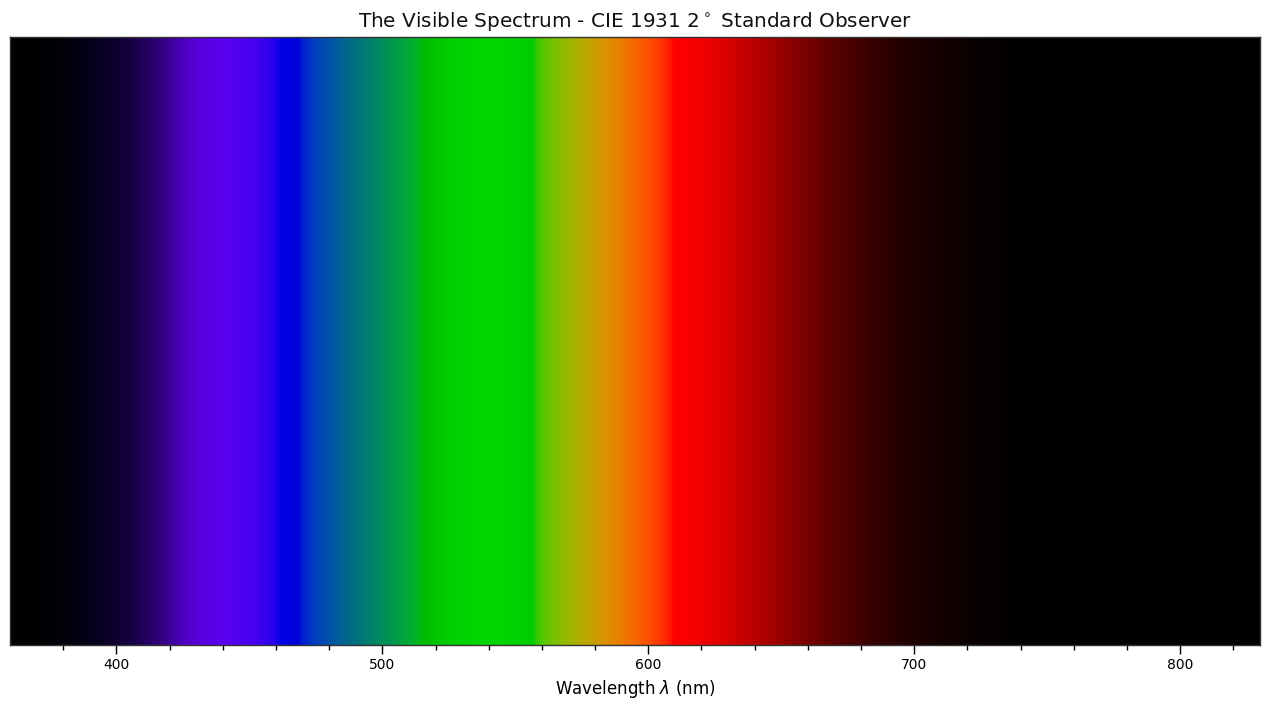

In [4]:
# https://www.colour-science.org/
import colour

colour.plotting.colour_style()

colour.plotting.plot_visible_spectrum();

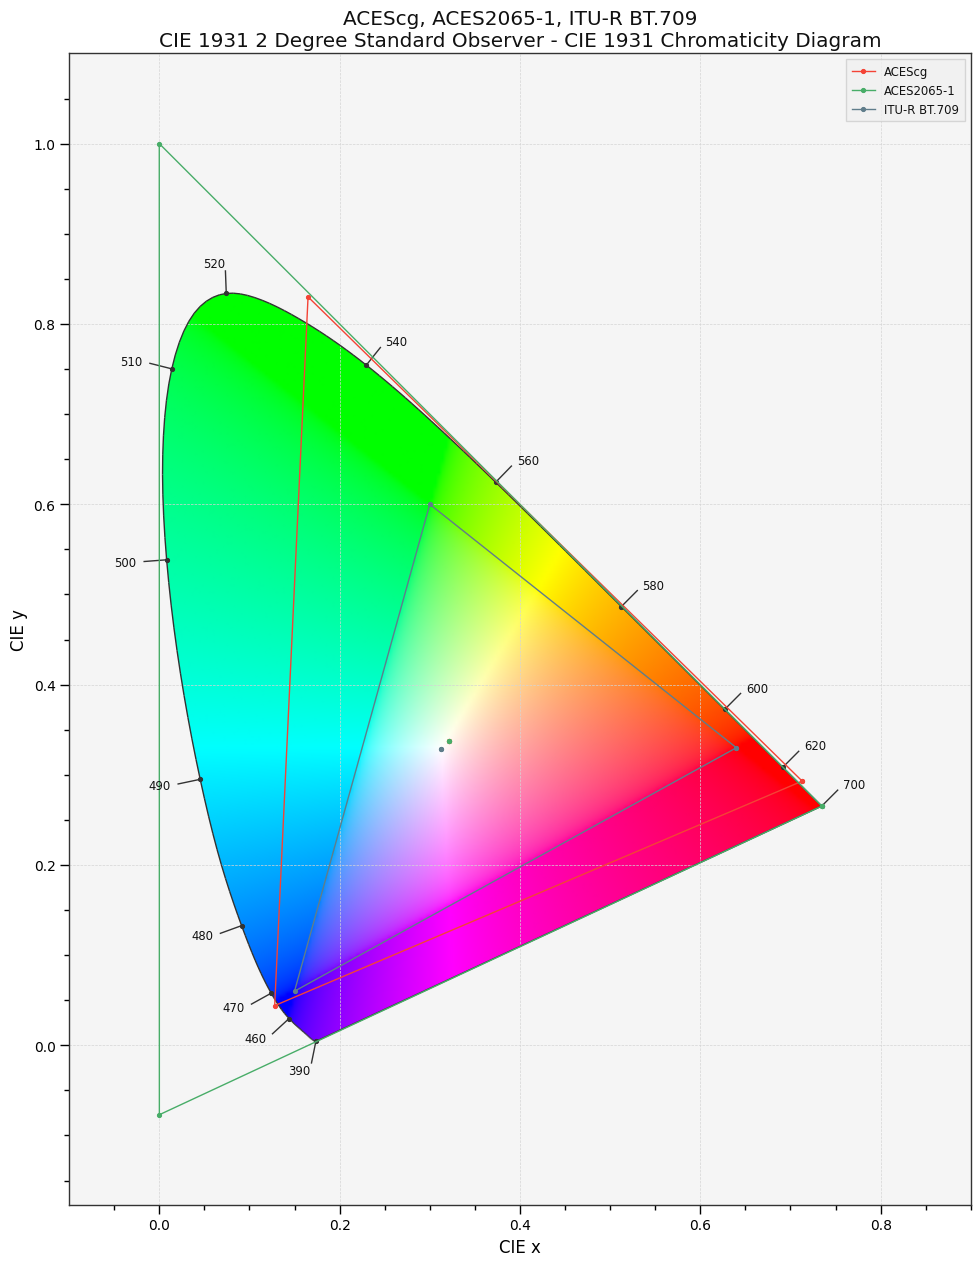

(<Figure size 1280x1280 with 1 Axes>,
 <AxesSubplot:title={'center':'ACEScg, ACES2065-1, ITU-R BT.709\nCIE 1931 2 Degree Standard Observer - CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

In [29]:
from pprint import pprint

colour.plotting.plot_RGB_colourspaces_in_chromaticity_diagram_CIE1931(["ACEScg", "ACES", "ITU-R BT.709"])

In [45]:
from colour import SDS_COLOURCHECKERS
sd=SDS_COLOURCHECKERS['ColorChecker N Ohta']['dark skin']
colour.sd_to_aces_relative_exposure_values(sd)  
colour.sd_to_aces_relative_exposure_values(sd,
    apply_chromatic_adaptation=True)
# colour.sd_to_aces_relative_exposure_values()

array([ 0.11807796,  0.08690312,  0.05891252])

## OpenImage

In [2]:
color_config = oiio.ColorConfig()
print(color_config.configname())
# color_config.getDisplayNames()
# color_config.getColorSpaceNames()

/ocio/OpenColorIO-Config-ACES-1.2/aces_1.2/config.ocio


In [3]:
oiio.ColorConfig().configname()

'/ocio/OpenColorIO-Config-ACES-1.2/aces_1.2/config.ocio'

In [4]:
bt2111 = oiio.ImageInput.open("data/BT.2111-sRGB.exr")
[bt2111.spec().channel_name(i) for i in range(0,3)]

['R', 'G', 'B']

In [7]:
transform = ocio.ColorSpaceTransform()
print(dir(transform))
transform.setDst('sRGB')
transform.setSrc('sRGB - linear')

print(transform.getDst())
print(transform.getSrc())

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'createEditableCopy', 'getDirection', 'getDst', 'getSrc', 'isEditable', 'setDirection', 'setDst', 'setSrc']
sRGB
sRGB - linear


## Numpy Color

In [6]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])